<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Use-pyresample-to-plot-channel-30-Tbright" data-toc-modified-id="Use-pyresample-to-plot-channel-30-Tbright-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Use pyresample to plot channel 30 Tbright</a></span></li><li><span><a href="#Copy-your-working-files-into-a301.data_dir-as-the-generic-files" data-toc-modified-id="Copy-your-working-files-into-a301.data_dir-as-the-generic-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Copy your working files into a301.data_dir as the generic files</a></span></li><li><span><a href="#Run-this-test-to-make-sure-the-files-match" data-toc-modified-id="Run-this-test-to-make-sure-the-files-match-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Run this test to make sure the files match</a></span></li><li><span><a href="#Calculate-chan-30-brightness-temperature" data-toc-modified-id="Calculate-chan-30-brightness-temperature-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate chan 30 brightness temperature</a></span></li><li><span><a href="#resample-the-brightness-temperatures" data-toc-modified-id="resample-the-brightness-temperatures-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>resample the brightness temperatures</a></span></li><li><span><a href="#replace-missing-values-with-floating-point-nan" data-toc-modified-id="replace-missing-values-with-floating-point-nan-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>replace missing values with floating point nan</a></span></li><li><span><a href="#Plot-the-image-using-cartopy" data-toc-modified-id="Plot-the-image-using-cartopy-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot the image using cartopy</a></span></li></ul></div>

# Use pyresample to plot channel 30 Tbright

This notebook uses a MYD03 file and a modis_chans.hdf file to resample the channel 30 radiance
from your granule onto a laea projection.

I've deleted two cells below (sections 5 and 6).  Using the cartopy_resample_ch30.ipynb and
the assign4_solution.ipynb notebooks as guides, fill those cells in with the code that plots the channel 30 brightness temperature for your granule.



In [1]:
import a301
import json
from a301.utils.data_read import download
import pprint
import shutil
from pyhdf.SD import SD, SDC
import json
from pyresample import kd_tree
from a301.scripts.modismeta_read import parseMeta
from a301.radiation import planck_invert


In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy
from pathlib import Path
import pprint
import numpy as np
import pdb
#

First run the modis_multichannel.ipynb notebook for your granule and get a
calibrated ch30,ch31 radiance file out.  Copy tha file into your a301_code/data directory.



# Copy your working files into a301.data_dir as the generic files

Make sure the following rad_file (from the modis_multichannel notebook) and
the MYD03 file (from NASA) are in your a301.data_dir folder with the
following names:

In [3]:
generic_rad = a301.data_dir / Path('rad_file_2018_10_1.hdf')
generic_m3 = a301.data_dir / Path('m3_file_2018_10_1.hdf')

# Run this test to make sure the files match

In [4]:
from a301.scripts import week5_test
week5_test.main()

working on /Users/phil/repos/a301_code/data/m3_file_2018_10_1.hdf, originally was MYD03.A2013222.2105.006.2013223155808.hdf
****************************************
lats.shape, lons.shape: (2040, 1354),(2040, 1354)
****************************************
working on /Users/phil/repos/a301_code/data/rad_file_2018_10_1.hdf, originally was MYD021KM.A2013222.2105.061.2018047235850.hdf
****************************************
array shape is: (2040, 1354)
****************************************
reading /Users/phil/repos/a301_code/data/m3_file_2018_10_1.hdf

dump area definition:
Area ID: laea_otf
Description: On-the-fly laea area
Projection: {'datum': 'WGS84', 'ellps': 'WGS84', 'lat_0': '39.59930047125515', 'lon_0': '-121.4046532375215', 'proj': 'laea', 'x_0': '0.0', 'y_0': '0.0'}
Number of columns: 1489
Number of rows: 2244
Area extent: (-1269577.2670031164, -1177871.0124334262, 1532183.743220972, 1265796.0146359466)


x and y pixel dimensions in meters:
1881.639362138407
1088.978176055870

In [5]:
# Read the lats and lons from the MYD03 file
generic_rad = a301.data_dir / Path('rad_file_2018_10_1.hdf')
generic_m3 = a301.data_dir / Path('m3_file_2018_10_1.hdf')
print(f'reading {generic_m3}')
m3_file = SD(str(generic_m3), SDC.READ)
lats = m3_file.select('Latitude').get()
lons = m3_file.select('Longitude').get()
m3_file.end()

reading /Users/phil/repos/a301_code/data/m3_file_2018_10_1.hdf


In [6]:
#Read ch30 from the generic_rad file
rad_file = SD(str(generic_rad), SDC.READ)
ch30 = rad_file.select('ch30').get()
rad_file.end()

# Calculate chan 30 brightness temperature

copy code from the assignment4 solution using planck_invert for channel 30

In [9]:
wavel_30= 1.e-6*(9.580 + 9.880)/2.
#
# convert from W/m^2/microns/sr to W/m^2/m/sr
#
Tbright30=planck_invert(wavel_30,ch30*1.e6)
# YOUR CODE HERE
# raise NotImplementedError()
# plt.hist(Tbright30.ravel())

# resample the brightness temperatures

now put the brightness temperatures on the grid following cartopy_resample_ch30.ipynb


In [10]:
from a301.geometry import get_proj_params
from pyresample import SwathDefinition
#
# make the projection from lon/lat to x/y
#
proj_params = get_proj_params(generic_m3)
swath_def = SwathDefinition(lons, lats)
area_def=swath_def.compute_optimal_bb_area(proj_dict=proj_params)
#
# put the pixels on the xy projection by sampling them onto a new
# array
#
#  original data was (2040, 1354) resampled data is (2244, 1489)
#
#
fill_value=-9999.
area_name = 'modis swath 5min granule'
Tbright_resample = kd_tree.resample_nearest(swath_def, Tbright30.ravel(),
                                  area_def, radius_of_influence=5000, 
                                      nprocs=2,fill_value=fill_value)
print(f'\ndump area definition:\n{area_def}\n')
print((f'\nx and y pixel dimensions in meters:'
       f'\n{area_def.pixel_size_x}\n{area_def.pixel_size_y}\n'))
# YOUR CODE HERE
# raise NotImplementedError()


dump area definition:
Area ID: laea_otf
Description: On-the-fly laea area
Projection: {'datum': 'WGS84', 'ellps': 'WGS84', 'lat_0': '39.59930047125515', 'lon_0': '-121.4046532375215', 'proj': 'laea', 'x_0': '0.0', 'y_0': '0.0'}
Number of columns: 1489
Number of rows: 2244
Area extent: (-1269577.2670031164, -1177871.0124334262, 1532183.743220972, 1265796.0146359466)


x and y pixel dimensions in meters:
1881.639362138407
1088.9781760558703



# replace missing values with floating point nan

In [11]:
nan_value = np.array([np.nan],dtype=np.float32)[0]
Tbright_resample[Tbright_resample < -9000]=nan_value

# Plot the image using cartopy

The read_resample_ch30 notebook shows how to make a better palette for this image

/Users/phil/mb36/lib/python3.6/site-packages/pyresample/_cartopy.py:36: UserWarning: 'cartopy' >= 0.17 required for better 'from_proj' functionality.
  warnings.warn("'cartopy' >= 0.17 required for better 'from_proj' "


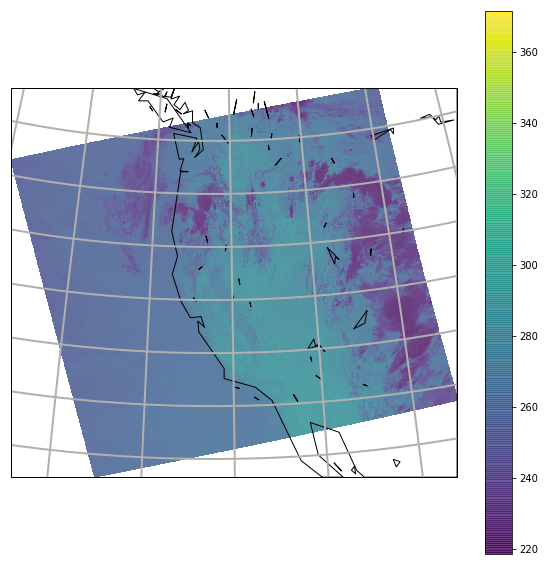

In [12]:
crs = area_def.to_cartopy_crs()
fig, ax = plt.subplots(1, 1, figsize=(10,10),
                          subplot_kw={'projection': crs})
ax.gridlines(linewidth=2)
ax.add_feature(cartopy.feature.GSHHSFeature(scale='coarse', levels=[1,2,3]));
ax.set_extent(crs.bounds,crs)
cs=ax.imshow(Tbright_resample, transform=crs, extent=crs.bounds, origin='upper',alpha=0.8)
fig.colorbar(cs);